# Implementation of the Perceptron Learning Algorithm on Iris Data Set

### by Laura Moses

*Used for classification.. write about the algorithm here...*

Let $$D={(x^i, y^i), \cdots,(x^N, y^N)},$$ where $$y^i = species \space setosa \space or \space versicolor,$$ $$x^i = sepal \space length \space and \space sepal \space width.$$

There are 50 data points for each iris species, so $D$ has a total of $N = 100$ data points. 

The data set will be split into a training data set and a test data set  such that

$$D_{training} \subseteq D$$ and $$D_{test} \subseteq D$$ and $$D_{training} \cap D_{test} = D$$

To split the total data set, we choose 35 random data points from each species, using the remaining 15 for each species in the test data set. Thus, the training dataset will consist of 70 data points total and the test dataset will have 30 data points total.

In [1]:
# import/load necessary packages
#import Pkg; Pkg.add("RDatasets")
#import Pkg; Pkg.add("Plots")
using RDatasets
using Plots

In [2]:
# Data exploration

# first 50 data points are setosa species
#iris.Species[1:50] 

# next 50 data points are versicolor species
#iris.Species[51:100] 

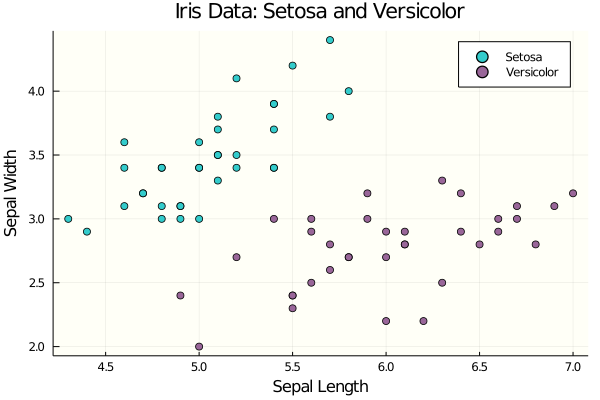

In [3]:
# access the iris dataset in RDatasets 
iris = dataset("datasets", "iris")

# Pull the setosa/versicolor sepal length and width data 
x_data = [x for x in zip(iris.SepalLength[1:100], iris.SepalWidth[1:100])]

# Assign 1 for setosa or -1 for versicolor
y_data = [y == "setosa" ? 1 : -1 for y in iris.Species[1:100]]

# Separate data into training and test sets
x_train = vcat(x_data[1:35], x_data[51:85]) # 35 training
x_test = vcat(x_data[36:50], x_data[86:100]) # 15 test

y_train = vcat(y_data[1:35], y_data[51:85]) # 35 training
y_test = vcat(y_data[36:50], y_data[86:100]) # 15 test

# Store label data for hypothesis checking
y_labels = [y for y in iris.Species[1:100]]
y_train_labels = vcat(y_labels[1:35], y_labels[51:85])
y_test_labels = vcat(y_labels[36:50], y_labels[86:100])

# plot setosa training dataset
scatter(x_train[1:35],
        label = "Setosa",
        color = "#33CCCC",
        background_color_inside = "#FFFFF7",
        xaxis = "Sepal Length",
        yaxis = "Sepal Width",
        title = "Iris Data: Setosa and Versicolor")

# plot versicolor training dataset
scatter!(x_train[36:70],
        label = "Versicolor",
        color = "#996699")

## The Perceptron Learning Algorithm
Suppose $X \subseteq \mathbb{R}^2$ and $Y=\{1,-1\}$.
1. Initialize $\bar w \in \mathbb{R}^3$ randomly
1. For each $(x,y) \in D$
    1. Form $\bar x = [1.0, x_1, x_2]^T$
    1. If $sign(\bar w^T \bar x) \neq y$, update $\bar w$ with $\bar w \to \bar w + y \bar x$    
If $epoch=k$, repeat Step 2 $k$ times.
1. Output is $g(x)=sign(\bar w^T \bar x)$ where $g(x)$ is the final hypothesis $\approx f$ the target function

In [4]:
# define sign function 
function sign(weights, x)
    x̄ = [1.0, x[1], x[2]]
    return weights'x̄ > 0 ? 1 : -1
end

sign (generic function with 1 method)

In [5]:
# define perceptron_update_rule function 
function perceptron_update_rule(weights, x, y)
    if sign(weights, x) != y
        weights += y*[1.0, x[1], x[2]]
    end
    
    return weights
end 

perceptron_update_rule (generic function with 1 method)

In [6]:
# define PLA function 
function PLA(X, Y; epochs = 1000)
    w = randn(3)
    
    counter = 1
    while counter  < epochs
        for i = 1:length(X)
            w = perceptron_update_rule(w, X[i], Y[i])
        end
        counter += 1
    end
    
    return w
end

PLA (generic function with 1 method)

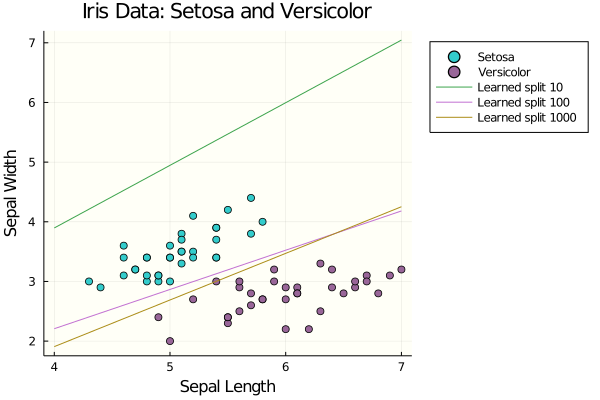

In [9]:
# Run this several times increasing epochs to 1000
w = PLA(x_data, y_data; epochs = 1000)
plot!([(x,(-w[2]*x - w[1]) / w[3]) for x = 4:7],
        label = "Learned split 1000",
        legend = :outertopright)

In [10]:
function predictor(weights, x)
    return sign(weights, x) == 1 ? "setosa" : "versicolor"
end

predictor (generic function with 1 method)

In [11]:
# Store original label data for hypothesis checking
y_labels = [y for y in iris.Species[1:100]]
y_train_labels = vcat(y_labels[1:35], y_labels[51:85])
y_test_labels = vcat(y_labels[36:50], y_labels[86:100])

30-element CategoricalArrays.CategoricalArray{String,1,UInt32}:
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 ⋮
 "versicolor"
 "versicolor"
 "versicolor"
 "versicolor"
 "versicolor"
 "versicolor"
 "versicolor"
 "versicolor"
 "versicolor"
 "versicolor"
 "versicolor"
 "versicolor"

In [20]:
# Run this cell several times to validate results 
k = rand(1:70)
println("Testing training x^", k)
println("The true label y^",k," = ", y_train_labels[k])
println("The predicted label g(x^",k,") = ", predictor(w, x_train[k]))

Testing training x^39
The true label y^39 = versicolor
The predicted label g(x^39) = versicolor


Now that we've used our training data build our perceptron algorithm, we want to measure the error rate of this algorithm. To do so I will be using the Classification Error method in which

$$Error = \frac{Number \space of \space incorrect \space predictions}{Total \space number \space of predictions \space made},$$

$$i.e. \space Error = \frac{1}{|D_{test}|} \sum_{i=1}^{|D_{test}|}[g(x^i)\neq y^i]$$

where $g(x_i)$ is the PLA function predicted label (setosa or versicolor) for a given feature $x^i$ in the `x_test` data set, and $y^i$ is the true corresponding label in the `y_test` data set. 

In [21]:
# define error_rate function 
function error_rate(X, Y)
    incorrect = 0
    for i = 1:length(X)
        if predictor(w, X[i]) != Y[i]
            incorrect += 1
        end
    end
    e = sum(incorrect) / length(X)
    return e
end

error_rate (generic function with 1 method)

In [22]:
println("The test error rate is: ",error_rate(x_test, y_test_labels))

The test error rate is: 0.0
